# Activity Worksheet: Central Limit Theorem (CLT) in EV Systems


Part A: Sampling Battery Range
Simulate a population of EV battery ranges using an exponential distribution (skewed distribution).
- Q1. Generate a population of 10,000 EV battery ranges (mean ~280 km).
- Q2. Draw 1000 random samples of size 30 each. Compute the mean of each sample.
- Q3. Plot the histogram of the sample means. What shape do you observe?
- Q4. How does this relate to the CLT

Q1. Generate a population of 10,000 EV battery ranges (mean ~280 km)
- We use an exponential distribution with mean ≈ 280 km. For an exponential distribution, the mean is 1/λ, so:
- λ=1/280 



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
mean_range = 280
lambda_param = 1 / mean_range
population_size = 10000

# Generate the population
population = np.random.exponential(scale=mean_range, size=population_size)


Q2. Draw 1000 random samples of size 30 each. Compute the mean of each sample

In [2]:
sample_size = 30
num_samples = 1000

# Draw samples and compute means
sample_means = [
    np.random.choice(population, size=sample_size, replace=False).mean()
    for _ in range(num_samples)
]


Q3. Plot the histogram of the sample means. What shape do you observe?

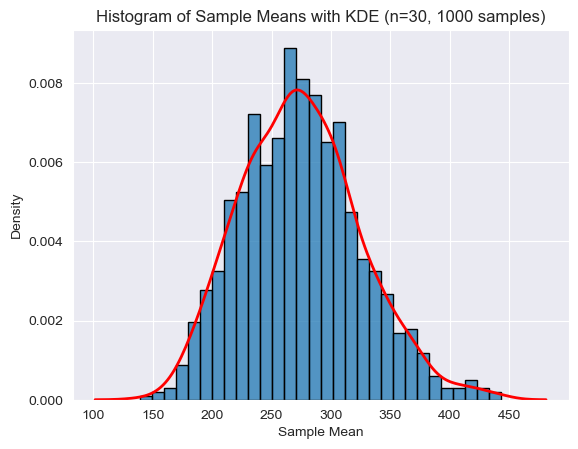

In [8]:
import seaborn as sns


# Plot histogram without KDE
sns.histplot(sample_means, bins=30, edgecolor='black', stat='density')  

# Overlay KDE with custom color
sns.kdeplot(sample_means, color='red', linewidth=2)

plt.title('Histogram of Sample Means with KDE (n=30, 1000 samples)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.grid(True)
plt.show()




# What are the Observations from the curve??


# Observations:
-Bell-Shaped Curve:

The KDE line over the histogram shows a roughly symmetric, bell-shaped distribution, even though the original population (exponential) is highly right-skewed.

-Center Around ~280 km:

The sample means are centered around the population mean (~280 km), which shows that the sampling distribution is unbiased.

-Reduced Variability:

Compared to the original exponential population (which likely ranged from very low to very high values), the sample means are more tightly clustered.

This is because averaging reduces variance (law of large numbers).

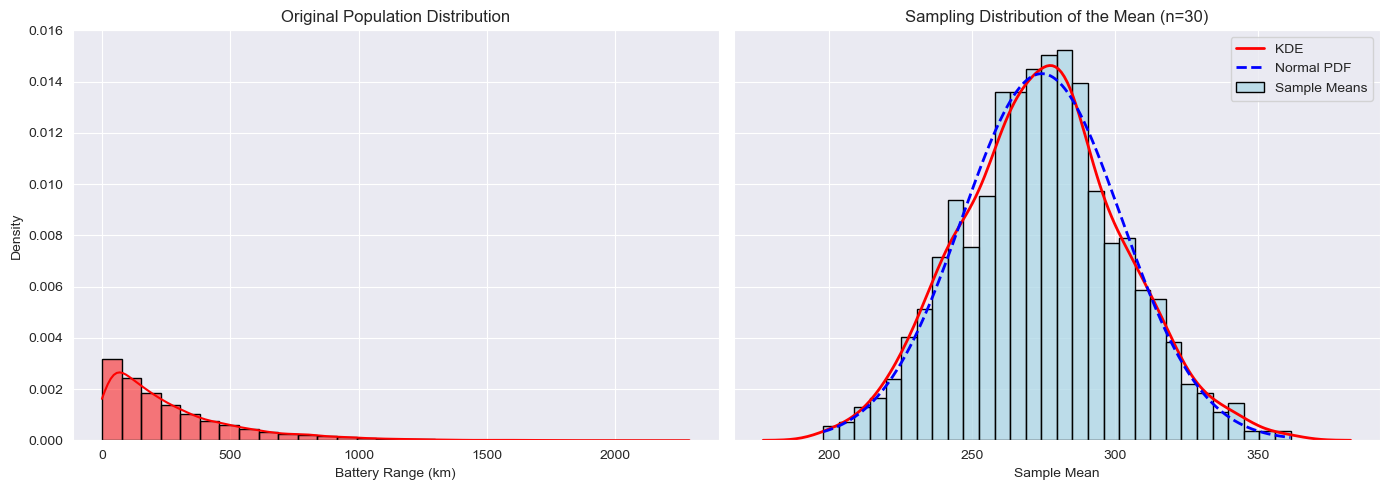

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# === Plot 1: Original Population ===
sns.histplot(population, bins=30, kde=True, stat='density', ax=axes[0], color='red', edgecolor='black')
axes[0].set_title('Original Population Distribution')
axes[0].set_xlabel('Battery Range (km)')
axes[0].set_ylabel('Density')
axes[0].grid(True)

# === Plot 2: Sampling Distribution of the Mean ===
sns.histplot(sample_means, bins=30, stat='density', edgecolor='black', ax=axes[1], label='Sample Means', color='lightblue')
sns.kdeplot(sample_means, color='red', linewidth=2, ax=axes[1], label='KDE')

# Overlay normal distribution
x = np.linspace(min(sample_means), max(sample_means), 1000)
normal_pdf = norm.pdf(x, loc=np.mean(sample_means), scale=np.std(sample_means))
axes[1].plot(x, normal_pdf, color='blue', linestyle='--', linewidth=2, label='Normal PDF')

axes[1].set_title('Sampling Distribution of the Mean (n=30)')
axes[1].set_xlabel('Sample Mean')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


Left Plot: Original Population Distribution
This shows the battery ranges of 10,000 EVs simulated from an exponential distribution.

The distribution is heavily right-skewed, meaning:

Most EVs have lower ranges (e.g., 0–400 km).

A few have very high ranges (some over 2000 km!).

This kind of skew is not normally distributed, and has long tails, which is typical of exponential distributions.

 Right Plot: Sampling Distribution of the Mean (n = 30)
This shows the distribution of means from 1000 samples of size 30.

Even though each sample came from a skewed population, the means of those samples form a bell-shaped curve.

Key features:

🔴 Red KDE line: Smooth estimate of the sampling distribution based on data.

🔵 Blue dashed line: Ideal normal distribution (same mean and std dev as the sample means).

Both curves are very close, which visually confirms the CLT.

# How This Relates to the Central Limit Theorem (CLT):
The Central Limit Theorem (CLT) states that:

If you take sufficiently large, random samples from any population — regardless of its original distribution — the distribution of the sample means will approximate a normal distribution (bell-shaped), as the sample size increases.

Step | What You Did | How It Relates to CLT
- | You generated a population of EV battery ranges from an exponential distribution (very skewed, not normal). | Proves CLT works even with non-normal data.
- 2️⃣ | You drew 1000 random samples of size 30, and calculated their means. | Demonstrates sampling from a population.
- 3️⃣ | You plotted the histogram of sample means, and saw a bell-shaped distribution. | The sampling distribution of the mean became normal, just like CLT predicts.
- 4️⃣ | You overlaid a normal curve, and it matched well. | Confirms CLT — the sample means follow a normal distribution, even if the population doesn't.

# Part B: Effect of Sample Size
Simulate the effect of increasing sample size.
- Q5. Repeat the above steps with sample sizes 5, 30, and 100.
- Q6. Plot all three histograms together. What happens as sample size increases?
- Q7. How does the spread (standard deviation) of sample means change?


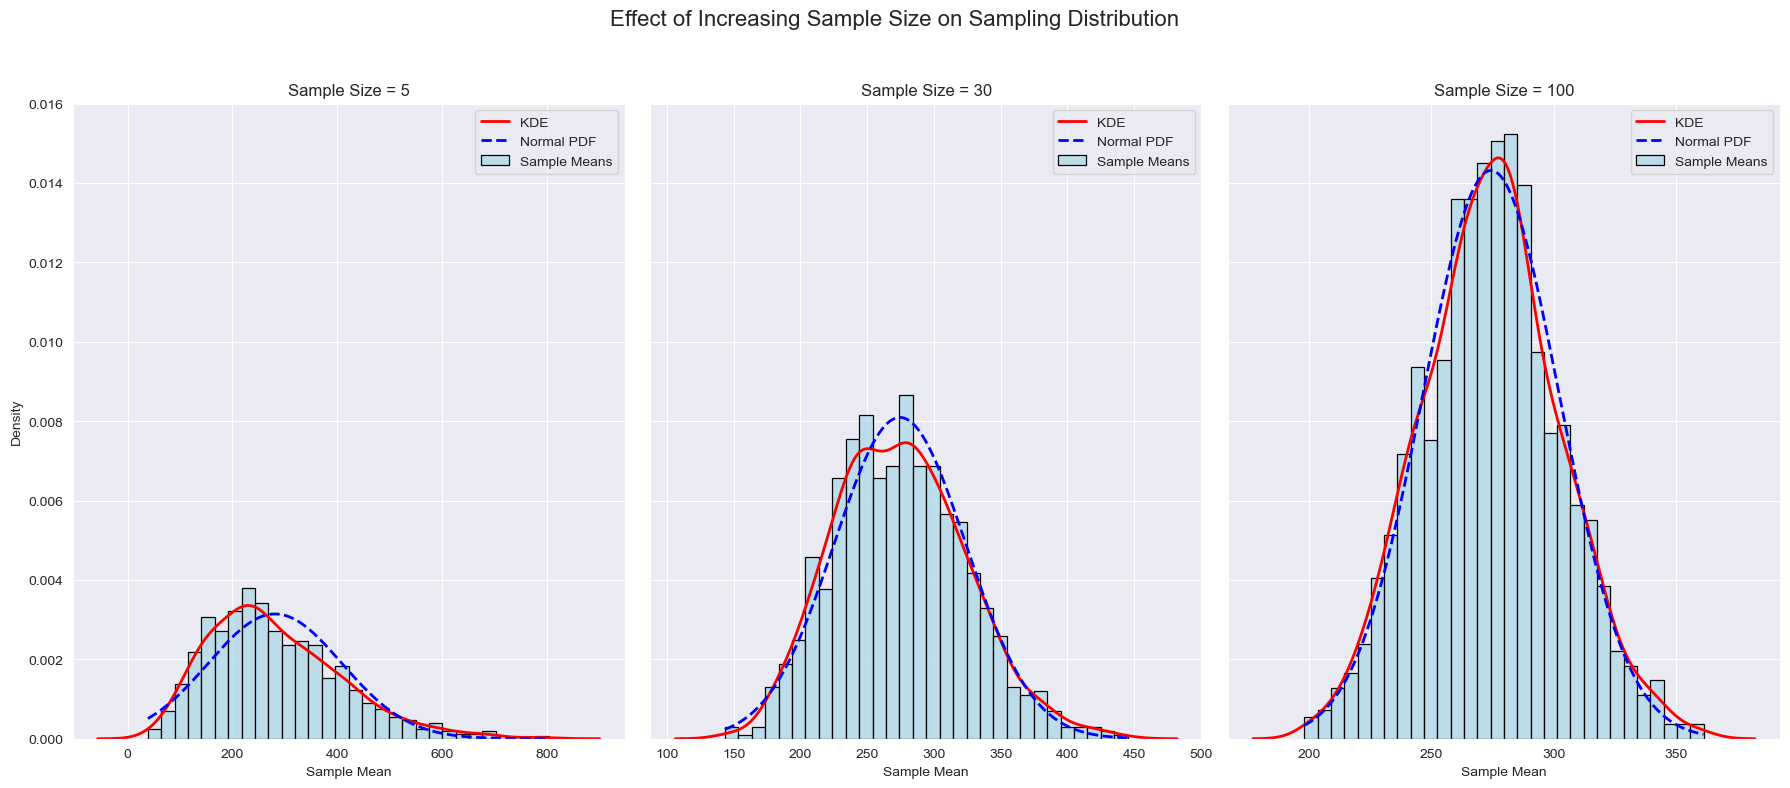

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulate original exponential population
np.random.seed(42)
population = np.random.exponential(scale=280, size=10000)

# Sample sizes to test
sample_sizes = [5, 30, 100]
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

for i, n in enumerate(sample_sizes):
    # Draw 1000 samples of size n
    sample_means = [np.mean(np.random.choice(population, size=n, replace=True)) for _ in range(1000)]
    
    # Plot histogram
    sns.histplot(sample_means, bins=30, stat='density', edgecolor='black', ax=axes[i], color='lightblue', label='Sample Means')
    
    # KDE
    sns.kdeplot(sample_means, color='red', linewidth=2, ax=axes[i], label='KDE')
    
    # Normal curve
    mean = np.mean(sample_means)
    std = np.std(sample_means)
    x = np.linspace(min(sample_means), max(sample_means), 1000)
    y = norm.pdf(x, loc=mean, scale=std)
    axes[i].plot(x, y, color='blue', linestyle='--', linewidth=2, label='Normal PDF')
    
    # Formatting
    axes[i].set_title(f'Sample Size = {n}')
    axes[i].set_xlabel('Sample Mean')
    if i == 0:
        axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True)

plt.suptitle('Effect of Increasing Sample Size on Sampling Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Sample Size | Shape of Sampling Distribution
- n = 5 | Wider spread, more variability, slightly skewed
- n = 30 | Narrower, smoother, bell-shaped
- n = 100 | Very tight, very close to normal

# Summary for Report/Slide:
As sample size increases, the sampling distribution of the mean becomes narrower and more normally distributed, even when drawn from a skewed population. This illustrates a core idea of the Central Limit Theorem — larger samples produce more stable and predictable estimates of the population mean.

# How Does the Spread Change?
The spread of the sampling distribution of the mean — measured by its standard deviation — is called the Standard Error of the Mean (SEM). It decreases as the sample size increases.



# Challenge Task


Create a Python function that takes a population, sample size, and number of samples, then returns the sampling distribution and a histogram plot. Use this to compare EV range, charging time, and temperature sensors.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sampling_distribution(population, sample_size=30, num_samples=1000, title='Sampling Distribution'):
    """
    Simulate a sampling distribution from a given population.
    
    Parameters:
    - population (array-like): The full population data.
    - sample_size (int): Number of observations per sample.
    - num_samples (int): Number of samples to draw.
    - title (str): Plot title.
    
    Returns:
    - sample_means (np.ndarray): The means of the sampled data.
    """
    sample_means = []

    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))

    # Convert to array for further use
    sample_means = np.array(sample_means)

    # Plot
    plt.figure(figsize=(10, 5))
    sns.histplot(sample_means, bins=30, kde=True, color='yellow', edgecolor='black', stat='density', label='Sample Means')
    
    # Overlay normal curve
    mean = np.mean(sample_means)
    std = np.std(sample_means)
    x = np.linspace(mean - 4*std, mean + 4*std, 100)
    plt.plot(x, 
             (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean)/std)**2),
             color='red', linestyle='--', label='Normal PDF')
    
    plt.title(f'{title} (n={sample_size}, {num_samples} samples)')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    return sample_means


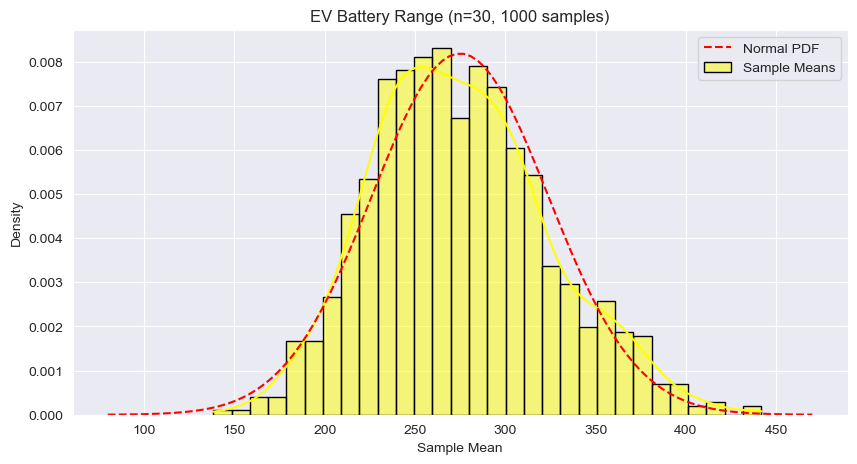

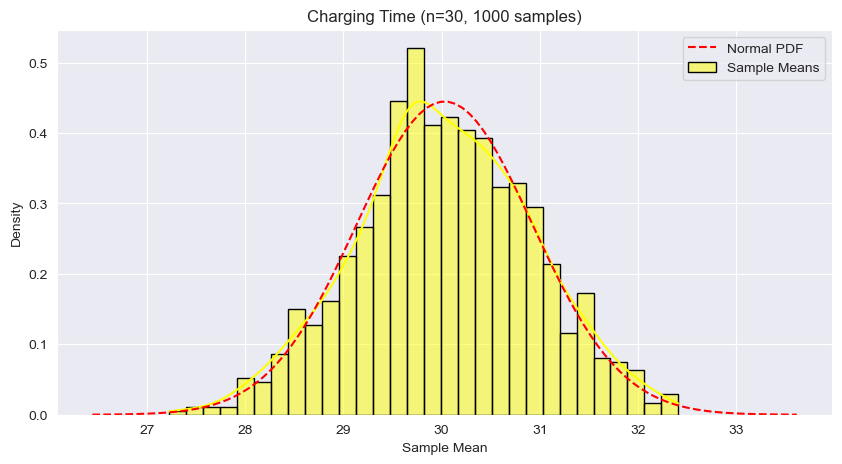

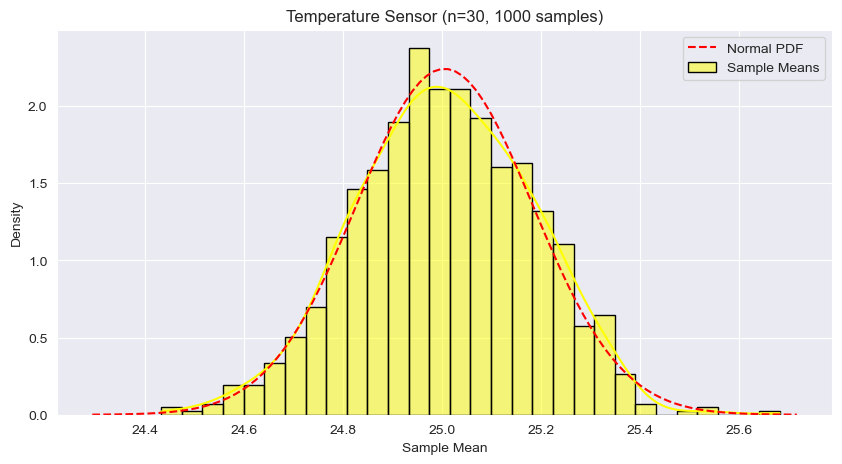

array([25.00153177, 25.11018837, 25.23431723, 25.01905761, 24.93645122,
       24.90419536, 25.12149057, 25.04300416, 24.86815735, 24.96323306,
       25.25279953, 25.16475739, 24.9131334 , 24.89284583, 25.10051035,
       24.59624844, 25.06545509, 24.86177919, 24.95275627, 24.79699962,
       25.08101806, 25.13400679, 25.03607177, 25.07440428, 24.83092717,
       24.66480015, 24.76673626, 25.31827807, 24.75428834, 25.1234175 ,
       24.86097555, 24.89688571, 25.01544927, 25.12432112, 24.80133321,
       24.82285002, 25.2740821 , 25.15163701, 24.83512691, 25.27859816,
       25.19833148, 25.04192593, 24.80765037, 24.70795278, 24.84354468,
       25.03964072, 25.33878482, 25.19780799, 25.08864986, 24.94367612,
       24.99136295, 24.96516406, 25.0927867 , 24.99555053, 24.99030722,
       24.99039303, 25.18996006, 24.87701786, 24.88741255, 24.92950608,
       24.95906462, 24.87840603, 25.09179902, 24.80879335, 24.57274848,
       25.15290267, 25.19737793, 24.91483745, 25.0055123 , 25.17

In [22]:
# Simulated data for demonstration
np.random.seed(42)

# 1. EV range: exponential (skewed)
ev_range = np.random.exponential(scale=280, size=10000)

# 2. Charging time: normal-like (e.g., 30 min ± 5 min)
charging_time = np.random.normal(loc=30, scale=5, size=10000)

# 3. Temperature sensor: tight Gaussian (e.g., 25°C ± 1°C)
temperature = np.random.normal(loc=25, scale=1, size=10000)

# Run comparisons
sampling_distribution(ev_range, sample_size=30, title='EV Battery Range')
sampling_distribution(charging_time, sample_size=30, title='Charging Time')
sampling_distribution(temperature, sample_size=30, title='Temperature Sensor')
